<a href="https://colab.research.google.com/github/ToshiroHJJZ/Detection-and-Classification-of-Linguistic-Features-for-Effective-Spam-Identification/blob/main/Original_Spam_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# encountered an utf-8 error,UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607:
#invalid continuation byte, encoding pandas to use 'latin-1', or 'ISO-8859-1'
df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')


In [ ]:
len(df)

5572

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Reference for help:
https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9

#Text Cleaning

###Converting to lowercase

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-6-614eaff662ae>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


###Removing URLs

When building a model, URLs are typically not relevant and can be removed from the text data.

For removing URLs we can use ‘regex’ library.

In [ ]:
import re

# Define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
df['v2'] = df['v2'].apply(remove_urls)

In [ ]:
len(df)

5572

###Spelling Correction

only for spelling correction:
https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.8 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spellings(text):
    # Join the list elements into a string
    text = " ".join(text)

    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            # Get the correction, or keep the original word if no correction is found
            correction = spell.correction(word)
            corrected_text.append(correction if correction is not None else word)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

# Apply the function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(correct_spellings)

In [ ]:
df.head()

,text,label
0,"g o u n t i l j u r o n g p o i n t , c r a z ...",0
1,o k l a r . . . j o k i n g w i f u o n i . . .,0
2,f r e e e n t r y i n 2 a w k l y c o m p t o ...,0
3,u d u n s a y s o e a r l y h o r . . . u c a ...,0
4,n a h i d o n ' t t h i n k h e g o e s t o u ...,0


####Removing remove non-word and non-whitespace characters

In [ ]:
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)

###Removing digits

In [ ]:
df = df.replace(to_replace=r'\d', value='', regex=True)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,ham,ok lar... joking wif u oni...,NaN,NaN,NaN
2,spam,free entry in a wkly comp to win fa cup final...,NaN,NaN,NaN
3,ham,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,ham,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###Removal of Punctuations

In [ ]:
import spacy
import string
import pandas as pd

pd.options.mode.chained_assignment = None

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    # Check if text is a list, and if so, join it into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["v2"] = df["v2"].apply(lambda text: remove_punctuation(text))
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry in a wkly comp to win fa cup final...,NaN,NaN,NaN
3,ham,u dun say so early hor u c already then say,NaN,NaN,NaN
4,ham,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN


#Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

* Import necessary modules: Imports nltk and word_tokenize.

* Download 'punkt' resource: nltk.download('punkt') is added to download the necessary data for sentence tokenization. This resolves the LookupError.

* Apply word tokenization: The original line applying word_tokenize to the 'text' column remains unchanged.

In [ ]:
# Download the 'punkt' resource
nltk.download('punkt')

df['v2'] = df['v2'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# check data changes
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"[go, until, jurong, point, crazy, available, o...",NaN,NaN,NaN
1,ham,"[ok, lar, joking, wif, u, oni]",NaN,NaN,NaN
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ...",NaN,NaN,NaN
3,ham,"[u, dun, say, so, early, hor, u, c, already, t...",NaN,NaN,NaN
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l...",NaN,NaN,NaN


#Stopword Removal

One of the advantages of removing stopwords is that it can reduce the size of the dataset, which in turn reduces the training time required for natural language processing models.

Libraries such as ‘Natural Language Toolkit’ (NLTK), ‘spaCy’, and ‘Scikit-Learn’ can be used to remove stopwords.

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords'): This line has been added to download the necessary 'stopwords' dataset. This command will initiate the NLTK Downloader, which allows you to select and download the required data package. Once downloaded, it will be stored in the designated NLTK data directory, and the error should be resolved.

In [ ]:
# Download the 'stopwords' dataset
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['v2'] = df['v2'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"[go, jurong, point, crazy, available, bugis, n...",NaN,NaN,NaN
1,ham,"[ok, lar, joking, wif, u, oni]",NaN,NaN,NaN
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,...",NaN,NaN,NaN
3,ham,"[u, dun, say, early, hor, u, c, already, say]",NaN,NaN,NaN
4,ham,"[nah, dont, think, goes, usf, lives, around, t...",NaN,NaN,NaN


#Stemming/Lemmatization

https://miro.medium.com/v2/resize:fit:720/format:webp/1*OYRDkAUMOWQ1Qx5T_4p8hQ.png


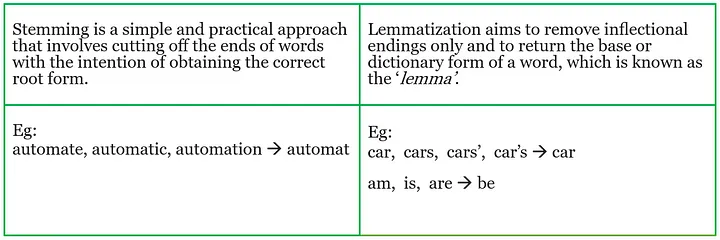

Algorithms for stemming:

· Porter Stemmer algorithm

· Snowball Stemmer algorithm

· Lovins Stemmer algorithm

###Porter Stemmer
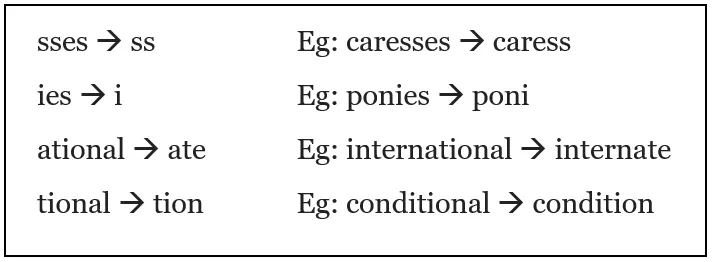

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply the function to the 'text' column and create a new column 'stemmed_text'
df['v2'] = df['v2'].apply(stem_words)

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",NaN,NaN,NaN
1,ham,"[ok, lar, joke, wif, u, oni]",NaN,NaN,NaN
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,...",NaN,NaN,NaN
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",NaN,NaN,NaN
4,ham,"[nah, dont, think, goe, usf, live, around, tho...",NaN,NaN,NaN


###Lemmatization

In [ ]:

nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
df['lemmatized_messages'] = df['text'].apply(lemmatize_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,label,stemmed_messages,lemmatized_messages
0,"[g, u, n, l, j, u, r, n, g, p, n, c, r, z, v, ...",0,"[g, u, n, l, j, u, r, n, g, p, n, c, r, z, v, ...","[g, u, n, l, j, u, r, n, g, p, n, c, r, z, v, ..."
1,"[k, l, r, j, k, n, g, w, f, u, n]",0,"[k, l, r, j, k, n, g, w, f, u, n]","[k, l, r, j, k, n, g, w, f, u, n]"
2,"[f, r, e, e, e, n, r, n, w, k, l, c, p, w, n, ...",0,"[f, r, e, e, e, n, r, n, w, k, l, c, p, w, n, ...","[f, r, e, e, e, n, r, n, w, k, l, c, p, w, n, ..."
3,"[u, u, n, e, r, l, h, r, u, c, l, r, e, h, e, n]",0,"[u, u, n, e, r, l, h, r, u, c, l, r, e, h, e, n]","[u, u, n, e, r, l, h, r, u, c, l, r, e, h, e, n]"
4,"[n, h, n, h, n, k, h, e, g, e, u, f, h, e, l, ...",0,"[n, h, n, h, n, k, h, e, g, e, u, f, h, e, l, ...","[n, h, n, h, n, k, h, e, g, e, u, f, h, e, l, ..."
...,...,...,...,...
315,"[r, g, h, r, e, u, w, r, k]",1,"[r, g, h, r, e, u, w, r, k]","[r, g, h, r, e, u, w, r, k]"
316,"[l, e, v, n, g, h, u, e, n, w]",1,"[l, e, v, n, g, h, u, e, n, w]","[l, e, v, n, g, h, u, e, n, w]"
317,"[h, e, l, l, l, v, e, w, h, r, e, u, n, g, u, ...",1,"[h, e, l, l, l, v, e, w, h, r, e, u, n, g, u, ...","[h, e, l, l, l, v, e, w, h, r, e, u, n, g, u, ..."
318,"[c, u, e, r, e, r, v, c, e, n, n, n, c, e, e, ...",1,"[c, u, e, r, e, r, v, c, e, n, n, n, c, e, e, ...","[c, u, e, r, e, r, v, c, e, n, n, n, c, e, e, ..."


#Exploratory Data Analysis (EDA)

Convert text colummn to vectorized form

In [ ]:
#Convert text column to vectorized form
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['text'] contains lists of words/tokens
# Join the elements of the list into a single string
df['v2'] = df['v2'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['v2'])

In [ ]:
x

<5572x7095 sparse matrix of type '<class 'numpy.int64'>'
	with 45251 stored elements in Compressed Sparse Row format>

In [ ]:
# Assuming 'v1' contains 'ham' and 'spam', which need encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1_encoded'] = encoder.fit_transform(df['v1']) # Create a new encoded column

# Apply StandardScaler to the encoded column
y = encoder.fit_transform(df[['v1_encoded']]) # Use double brackets to keep it as a DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


###Data split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


###Logistic Regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
# Fix the import statement by changing 'sklearn.metric' to 'sklearn.metrics'
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Ramdom forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rd = rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



#Visuals